In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import plotly.express as px
import plotly.graph_objects as go

In [108]:
# Load dataset
df = pd.read_csv('/Users/eleftheriatsioufi/Downloads/index.csv')

In [166]:
# Examine dataset
print("First 5 rows of the dataset:")
print(df.head())
print("\n")

print("Column names in the dataset:")
print(df.columns)
print("\n")

print("Information about the dataset:")
print(df.info())
print("\n")

print("Missing values in the dataset:")
print(df.isnull().sum())
print("\n")

print("Number of duplicated rows in the dataset:")
print(df.duplicated().sum())
print("\n")

print("Statistical summary of the dataset:")
print(df.describe())
print("\n")


First 5 rows of the dataset:
        date                datetime cash_type                 card  money    coffee_name    month day hour weekday_name
0 2024-03-01 2024-03-01 10:15:50.520      card  ANON-0000-0000-0001     39          Latte  2024-03   5   10       Friday
1 2024-03-01 2024-03-01 12:19:22.539      card  ANON-0000-0000-0002     39  Hot Chocolate  2024-03   5   12       Friday
2 2024-03-01 2024-03-01 12:20:18.089      card  ANON-0000-0000-0002     39  Hot Chocolate  2024-03   5   12       Friday
3 2024-03-01 2024-03-01 13:46:33.006      card  ANON-0000-0000-0003     29      Americano  2024-03   5   13       Friday
4 2024-03-01 2024-03-01 13:48:14.626      card  ANON-0000-0000-0004     39          Latte  2024-03   5   13       Friday


Column names in the dataset:
Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name', 'month', 'day', 'hour', 'weekday_name'], dtype='object')


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11

In [110]:
# Check uniqueness and frequency of specific columns
print(df[['cash_type', 'card', 'coffee_name']].describe().T)

            count unique                  top  freq
cash_type    1133      2                 card  1044
card         1044    446  ANON-0000-0000-0012    88
coffee_name  1133      8  Americano with Milk   268


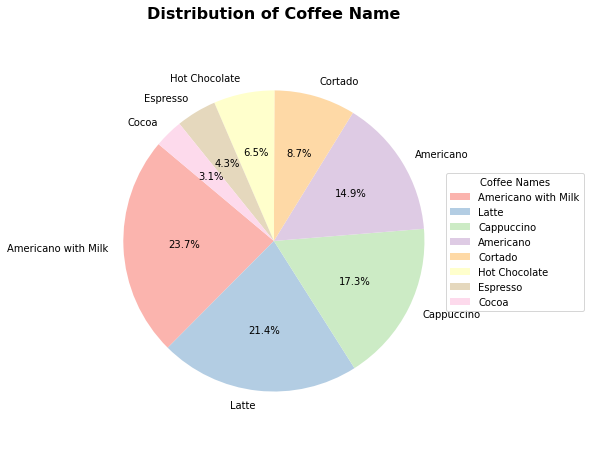

In [169]:
# Q1: What is the distribution of coffee types and quantities sold 
def plot_coffee_distribution(df):
    value_counts = df['coffee_name'].value_counts()
    coffee_name_perc = (value_counts / value_counts.sum()) * 100

    plt.figure(figsize=(6, 8))
    plt.gca().set_facecolor('white') 
    plt.gcf().patch.set_facecolor('white')  

    light_colors = plt.get_cmap('Pastel1').colors  

    wedges, texts, autotexts = plt.pie(
        coffee_name_perc,
        labels=coffee_name_perc.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=light_colors  
    )

    for autotext in autotexts:
        autotext.set_color('black')
    for text in texts:
        text.set_color('black')

    plt.title('Distribution of Coffee Name', fontsize=16, weight='bold', color='black')
    plt.axis('equal')
    plt.legend(coffee_name_perc.index, title="Coffee Names", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

plot_coffee_distribution(df)


### Most frequent coffee is Americano with Milk (23.7%) and least frequent is Cocoa (3.1%)


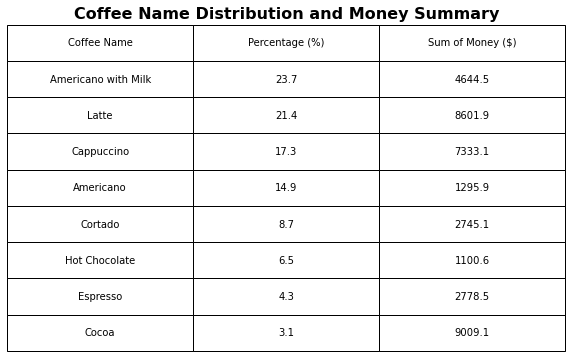

In [170]:
# Q2: What is the money earned by each coffee type
def coffee_money_summary(df):
    money_sums = df.groupby('coffee_name')['money'].sum()
    value_counts = df['coffee_name'].value_counts()
    coffee_name_perc = (value_counts / value_counts.sum()) * 100

    table_data = pd.DataFrame({
        'Coffee Name': coffee_name_perc.index,
        'Percentage (%)': [f'{perc:.1f}' for perc in coffee_name_perc.values],
        'Sum of Money ($)': [f'{money:.1f}' for money in money_sums.values]
    })

    plt.figure(figsize=(10, 6))
    plt.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
    plt.title('Coffee Name Distribution and Money Summary', fontsize=16, weight='bold')
    plt.axis('off')
    plt.show()

coffee_money_summary(df)

Most profitable coffee is cocoa even though it is the least preferred. Least profitable is Hot Chocolate which has a 6.5% share out of all the coffee types


In [115]:
# Convert date and datetime to datetime
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

In [116]:
# Create month, day, and hour columns
df['month'] = df['date'].dt.strftime('%Y-%m')
df['day'] = df['date'].dt.strftime('%w')
df['hour'] = df['datetime'].dt.strftime('%H')

In [171]:
# Extract start and end dates
start_date = df['date'].min()
end_date = df['date'].max()
duration_days = (end_date - start_date).days

print(f"Start date is {start_date.strftime('%Y-%m-%d')}, end date is {end_date.strftime('%Y-%m-%d')}, and duration is {duration_days} days.")

Start date is 2024-03-01, end date is 2024-07-31, and duration is 152 days.


### COFFEE TRENDS

In [172]:
# Q3: What are the monthly sales trends for each coffee type
def plot_monthly_sales(df):
    monthly_sales = df.groupby(['coffee_name', 'month']).count()['date'].reset_index().rename(columns={'date': 'count'}).pivot(index='month', columns='coffee_name', values='count').reset_index()
    monthly_sales_melted = monthly_sales.melt(id_vars='month', var_name='coffee_name', value_name='count')

    fig = px.line(monthly_sales_melted, x='month', y='count', color='coffee_name', markers=True,
                  labels={'count': 'Count', 'month': 'Month', 'coffee_name': 'Coffee Name'},
                  title='Monthly Coffee Sales')

    fig.update_layout(title={'x': 0.5, 'xanchor': 'center', 'font': {'size': 16, 'family': 'Arial'}},
                      xaxis_title='Month',
                      yaxis_title='Count',
                      legend_title='Coffee Name',
                      legend=dict(font=dict(size=11)),
                      template='plotly_white')

    fig.show()
    
plot_monthly_sales(df)

In [174]:
# Grouping by coffee name and month
monthly_sales_group = df.groupby(['coffee_name', 'month']).size().reset_index(name='count')

# Pivoting to create a table with coffee types as columns and months as rows
pivoted_sales = monthly_sales_group.pivot(index='month', columns='coffee_name', values='count').reset_index()
pivoted_sales = pivoted_sales.apply(pd.to_numeric, errors='ignore')
pivoted_sales['Total'] = pivoted_sales.drop(columns='month').sum(axis=1)

# Sorting by Total from highest to lowest
pivoted_sales = pivoted_sales.sort_values(by='Total', ascending=False)

# Display settings
pd.set_option('display.float_format', '{:,.0f}'.format)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)  

print(pivoted_sales)

coffee_name    month  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  Espresso  Hot Chocolate  Latte  Total
2            2024-05         48                   58          55      9       17         8             14     58    267
4            2024-07         36                   65          32      9       14        14             11     56    237
3            2024-06         14                   69          46      5       19        10             14     50    227
0            2024-03         36                   34          20      6       30        10             22     48    206
1            2024-04         35                   42          43      6       19         7             13     31    196


May has the highest sales.


### WEEKDAY TRENDS

In [175]:
# Q4: What are the weekday sales trends for each coffee type
def plot_weekday_sales(df):
    df['weekday_name'] = df['date'].dt.day_name()
    day_sales = df.groupby(['coffee_name', 'weekday_name']).count()['date'].reset_index().rename(columns={'date': 'count'})

    day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    day_sales['weekday_name'] = pd.Categorical(day_sales['weekday_name'], categories=day_order, ordered=True)
    day_sales = day_sales.sort_values('weekday_name')

    fig = px.line(day_sales, x='weekday_name', y='count', color='coffee_name', markers=True,
                  labels={'count': 'Count', 'weekday_name': 'Day', 'coffee_name': 'Coffee Name'},
                  title='Daily Coffee Sales')

    fig.update_layout(title={'x': 0.5, 'xanchor': 'center', 'font': {'size': 16, 'family': 'Arial'}},
                      xaxis_title='Day',
                      yaxis_title='Count',
                      legend_title='Coffee Name',
                      legend=dict(font=dict(size=11)),
                      template='plotly_white')

    fig.show()

plot_weekday_sales(df)

In [176]:
# Grouping by coffee name and weekday
weekday_sales_group = df.groupby(['coffee_name', df['date'].dt.day_name()]).size().reset_index(name='count')

# Pivoting to create a table with coffee types as columns and weekdays as rows
pivoted_weekday_sales = weekday_sales_group.pivot(index='date', columns='coffee_name', values='count').reset_index()
pivoted_weekday_sales = pivoted_weekday_sales.apply(pd.to_numeric, errors='ignore')

# Sorting the days in a specific order
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
pivoted_weekday_sales['date'] = pd.Categorical(pivoted_weekday_sales['date'], categories=day_order, ordered=True)
pivoted_weekday_sales = pivoted_weekday_sales.sort_values('date')

# Adding a total column
pivoted_weekday_sales['Total'] = pivoted_weekday_sales.drop(columns='date').sum(axis=1)

# Sorting by Total from highest to lowest
pivoted_weekday_sales = pivoted_weekday_sales.sort_values(by='Total', ascending=False)

pd.set_option('display.float_format', '{:,.0f}'.format)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)  

print(pivoted_weekday_sales)

coffee_name       date  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  Espresso  Hot Chocolate  Latte  Total
5              Tuesday         26                   54          27      9       18         3             15     33    185
6            Wednesday         23                   35          29      6       18        13              8     33    165
4             Thursday         24                   31          27      1       14         9             12     46    164
0               Friday         25                   34          23      7       16         8             13     37    163
2             Saturday         17                   48          31      6        8         4              7     33    154
3               Sunday         17                   34          28      3       14         8             14     33    151
1               Monday         37                   32          31      3       11         4              5     28    151


Tuesday has the highest sales.

### HOURLY SALES

In [177]:
# Q5: What are the hourly sales trends for each coffee type
def plot_hourly_sales(df):
    day_sales = df.groupby(['coffee_name', 'hour']).count()['date'].reset_index().rename(columns={'date': 'count'})

    fig = px.line(day_sales, x='hour', y='count', color='coffee_name', markers=True,
                  labels={'count': 'Count', 'hour': 'Hour', 'coffee_name': 'Coffee Name'},
                  title='Hourly Coffee Sales')

    fig.update_layout(title={'x': 0.5, 'xanchor': 'center', 'font': {'size': 16, 'family': 'Arial'}},
                      xaxis_title='Hour',
                      yaxis_title='Count',
                      legend_title='Coffee Name',
                      legend=dict(font=dict(size=11)),
                      template='plotly_white')

    fig.show()
    
plot_hourly_sales(df)

In [139]:
# Grouping by coffee name and hour
hourly_sales_group = df.groupby(['coffee_name', 'hour']).size().reset_index(name='count')

# Pivoting to create a table with coffee types as columns and hours as rows
pivoted_hourly_sales = hourly_sales_group.pivot(index='hour', columns='coffee_name', values='count').reset_index()
pivoted_hourly_sales = pivoted_hourly_sales.apply(pd.to_numeric, errors='ignore')

# Adding a total column
pivoted_hourly_sales['Total'] = pivoted_hourly_sales.drop(columns='hour').sum(axis=1)

# Sorting by Total from highest to lowest
pivoted_hourly_sales = pivoted_hourly_sales.sort_values(by='Total', ascending=False)

pd.set_option('display.float_format', '{:,.0f}'.format)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)  

print(pivoted_hourly_sales)

10 in the morning has the highest sales.


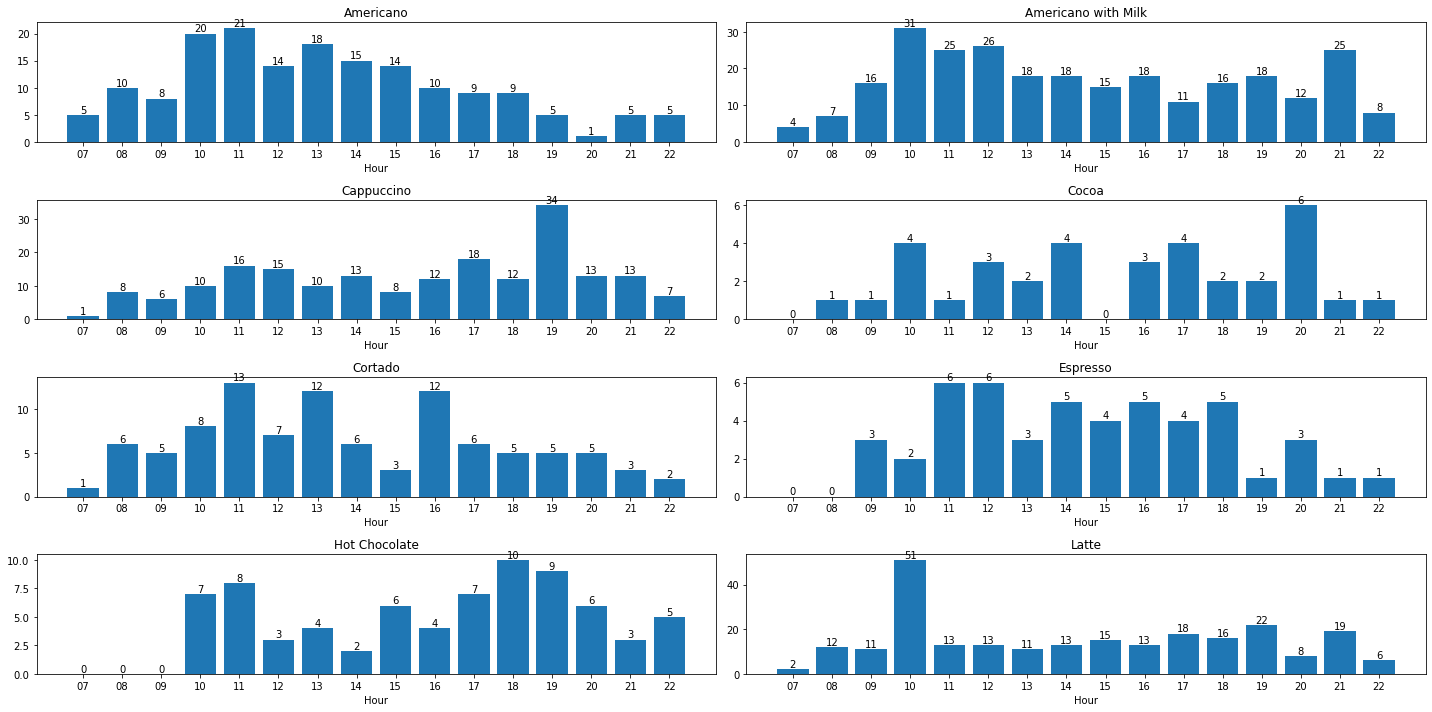

In [178]:
# Q6: What are the peak hours
hourly_sales_by_coffee = df.groupby(['hour','coffee_name']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='hour',columns='coffee_name',values='count').fillna(0).reset_index()
hourly_sales_by_coffee
fig, axs = plt.subplots(4, 2, figsize=(20, 10))
axs = axs.flatten()
for i, column in enumerate(hourly_sales_by_coffee.columns[1:]):  # Skip the first column ('Index')
    bars = axs[i].bar(hourly_sales_by_coffee['hour'], hourly_sales_by_coffee[column])
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('Hour')

    for bar in bars:
        height = bar.get_height()
        axs[i].text(
            bar.get_x() + bar.get_width() / 2, 
            height, 
            f'{int(height)}', 
            ha='center', 
            va='bottom'
        )
plt.tight_layout()

plt.show()

Stronger coffees (americano, espresso, cortado) are preferred mostly in the morning and least after 21:00, while lighter coffees or non caffeine drinks (cappuccino, hot chocolate, cocoa) are preffered mostly during afternoon or end of the day. Americano with milk and latte are choices thouthout the day with peak hour being at 10 am.


### PAYMENT METHOD ANALYSIS

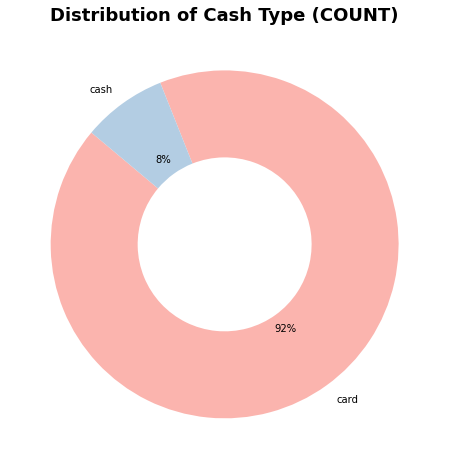

In [165]:
# Q7: What is the distribution of payment types used by customers (count)
def plot_cash_type_distribution(df):
    value_counts = df['cash_type'].value_counts()
    cash_type_perc = (value_counts / value_counts.sum()) * 100

    plt.figure(figsize=(10, 8))
    plt.gca().set_facecolor('white') 
    plt.gcf().patch.set_facecolor('white') 
    light_colors = plt.get_cmap('Pastel1').colors  

    wedges, texts, autotexts = plt.pie(
        cash_type_perc,
        labels=cash_type_perc.index,
        autopct=lambda p: f'{p:.0f}%',
        startangle=140,
        colors=light_colors,
        shadow=False,
        wedgeprops=dict(width=0.5)
    )
    
    for autotext in autotexts:
        autotext.set_color('black')
    for text in texts:
        text.set_color('black')
    
    plt.title('Distribution of Cash Type (COUNT)', fontsize=18, weight='bold', color='black')
    plt.show()

plot_cash_type_distribution(df)


### Card is almost 12 times preffered over cash. 

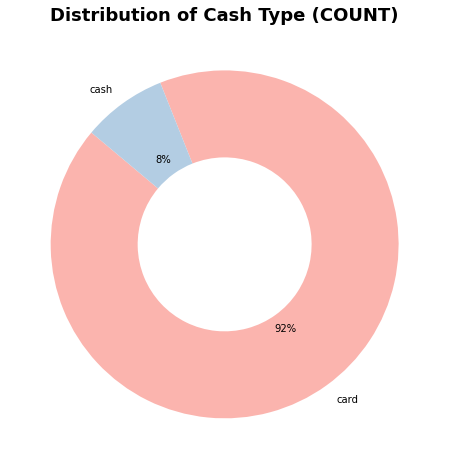

In [179]:
# Q8: What is the total revenue percentage generated by each payment type
def plot_cash_type_distribution(df):
    value_counts = df['cash_type'].value_counts()
    cash_type_perc = (value_counts / value_counts.sum()) * 100

    plt.figure(figsize=(10, 8))
    plt.gca().set_facecolor('white')  
    plt.gcf().patch.set_facecolor('white')  

    light_colors = plt.get_cmap('Pastel1').colors 

    wedges, texts, autotexts = plt.pie(
        cash_type_perc,
        labels=cash_type_perc.index,
        autopct=lambda p: f'{p:.0f}%',
        startangle=140,
        colors=light_colors,  
        shadow=False,
        wedgeprops=dict(width=0.5)
    )
    for autotext in autotexts:
        autotext.set_color('black')
    for text in texts:
        text.set_color('black')
    
    plt.title('Distribution of Cash Type (COUNT)', fontsize=18, weight='bold', color='black')
    plt.show()
    
plot_cash_type_distribution(df)

Almost 35k are paid by card and 3k by cash. 

In [147]:
# Q9: What is the monthly revenue by payment type
def plot_monthly_cash_type_revenue(df):
    money_cash_type_monthly = df.groupby(['cash_type', 'month'])['money'].sum().reset_index()
    pivot_df = money_cash_type_monthly.pivot(index='month', columns='cash_type', values='money').fillna(0)

    fig = go.Figure()

    for cash_type in pivot_df.columns:
        fig.add_trace(go.Bar(
            x=pivot_df.index,
            y=pivot_df[cash_type],
            name=cash_type
        ))

    fig.update_layout(
        title='Monthly Sum of Money by Cash Type',
        xaxis_title='Month',
        yaxis_title='Sum of Money',
        barmode='stack',
        xaxis_tickangle=-45,
        legend_title='Cash Type',
        template='seaborn'
    )
    fig.show()
    
plot_monthly_cash_type_revenue(df)

May is the month with the most sales (~9k) and April the least profitable (~6.8k)

### CUSTOMER BEHAVIOUR

In [180]:
# Q10: What is the frequency of each coffee type per frequent customer & what is the monthly spending per frequent customer
def analyze_customer_behaviour(df):
    card_counts = df['card'].value_counts()
    accounts_to_keep = card_counts[card_counts >= 20].index
    filtered_df = df[df['card'].isin(accounts_to_keep)]

    pivot_table = filtered_df.pivot_table(index='card', columns='coffee_name', aggfunc='size', fill_value=0)
    pivot_df = pivot_table.reset_index()
    print(tabulate(pivot_df, headers='keys', tablefmt='grid', showindex=False))

    grouped = filtered_df.groupby(['card', 'month'])['money'].sum().reset_index()
    
    for account in grouped['card'].unique():
        account_data = grouped[grouped['card'] == account]
        total_sum = account_data['money'].sum()

        fig = px.line(account_data, x='month', y='money', markers=True,
                      title=f'Spending Over Time for Bank Account {account}')
        fig.add_annotation(x=1, y=1, xref='paper', yref='paper',
                           text=f'Total Spent: {total_sum:.1f}',
                           showarrow=False, font=dict(size=12),
                           xanchor='right', yanchor='top')

        fig.update_layout(xaxis_title='Month', yaxis_title='Amount Spent')
        fig.show() 
    analyze_customer_behaviour(df)



Most frequent customer bought 88 coffees, 40 of them being Americano. The customer spent ~ 2.5k with March having the largest amount spent (~732).

3 out of 5 accounts, spent the most on April 2024 while July was the least consumed month for 3 out of 5. 

